1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$
has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

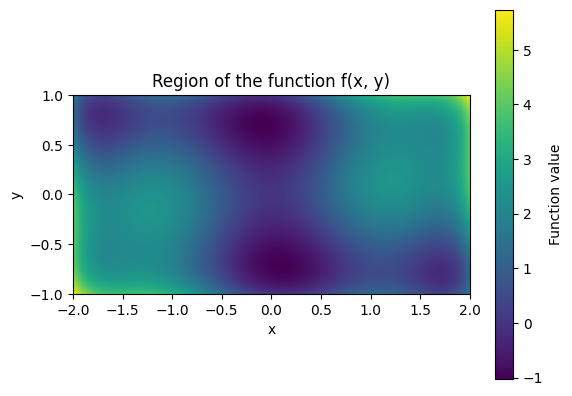

GLOBAL MINIMA:
	- Point: (x = -1.7036067179866117, y = 0.7960835818801775) => Value: -0.21546382438371692
	- Point: (x = 0.08984203338873575, y = -0.7126564272279498) => Value: -1.0316284534898714
	- Point: (x = -0.08984204618626519, y = 0.7126564139167026) => Value: -1.0316284534898725
	- Point: (x = 1.7036067107648547, y = -0.79608359641858) => Value: -0.21546382438371003


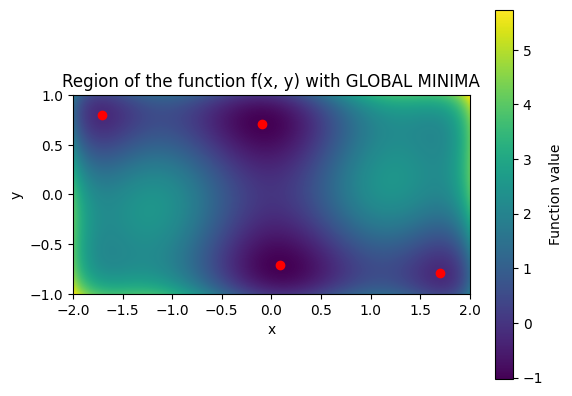

For (x, y) = (0, 0):
	- Point: (x = 0.0, y = 0.0) => Value: 0.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the six-hump camelback function
def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4) * x[1]**2

# Visualize the function
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)

plt.imshow(f(np.array([X, Y])), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Function value')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Region of the function f(x, y)')
plt.show()

# Find multiple global minima using scipy.optimize.minimize
initial_guesses = [(-1.8, 0.8), (0, -0.8), (0, 0.8), (1.8, -0.8)]
global_minima = []

for guess in initial_guesses:
    result = minimize(f, guess)
    if result.success:
        global_minima.append((result.x, result.fun))

# Display the results
print("GLOBAL MINIMA:")
for point, value in global_minima:
    print(f"\t- Point: (x = {point[0]}, y = {point[1]}) => Value: {value}")

# Plot the function and global minima
plt.imshow(f(np.array([X, Y])), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Function value')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Region of the function f(x, y) with GLOBAL MINIMA')

for point, value in global_minima:
    plt.scatter(point[0], point[1], color='red', marker='o')

plt.show()

# Check what happens for an initial guess of (x, y) = (0, 0)
initial_guess = (0, 0)
result_at_origin = minimize(f, initial_guess)

print(f"For (x, y) = (0, 0):")
print(f"\t- Point: (x = {result_at_origin.x[0]}, y = {result_at_origin.x[1]}) => Value: {result_at_origin.fun}")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

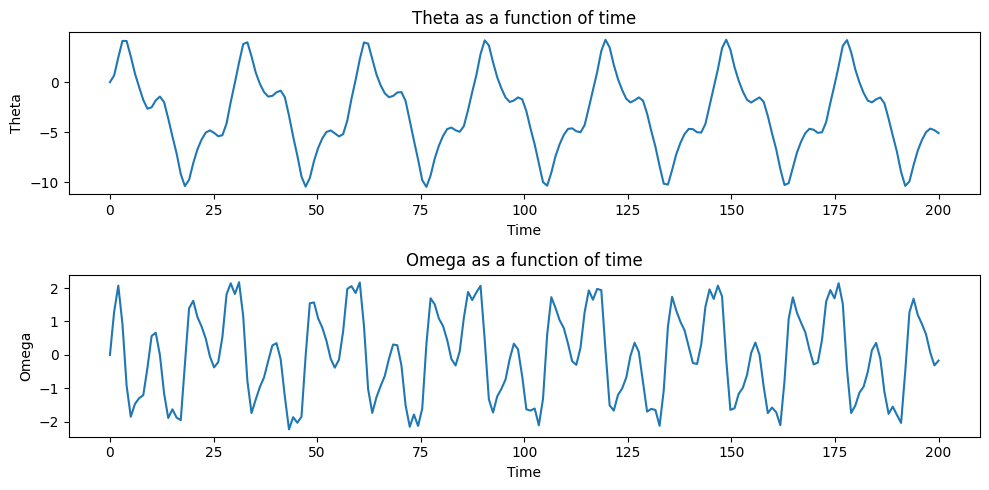

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function that represents the system of ODEs
def pendulum(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dydt = [omega, -1/Q * omega + g/l * np.sin(theta) + d * np.cos(Omega * t)]
    return dydt

# Set the initial conditions and parameters
theta0 = 0
omega0 = 0
l = 10
Q = 2.0
d = 1.5
Omega = 0.65

# Set the time points at which to evaluate the solution
t = np.linspace(0, 200, 200)

# Solve the ODE using odeint
sol = odeint(pendulum, [theta0, omega0], t, args=(Q, 9.8, l, d, Omega))

# Extract the solution for theta and omega
theta = sol[:, 0]
omega = sol[:, 1]

# Create plots of theta and omega as functions of time
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta as a function of time')

plt.subplot(2, 1, 2)
plt.plot(t, omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.title('Omega as a function of time')

plt.tight_layout()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

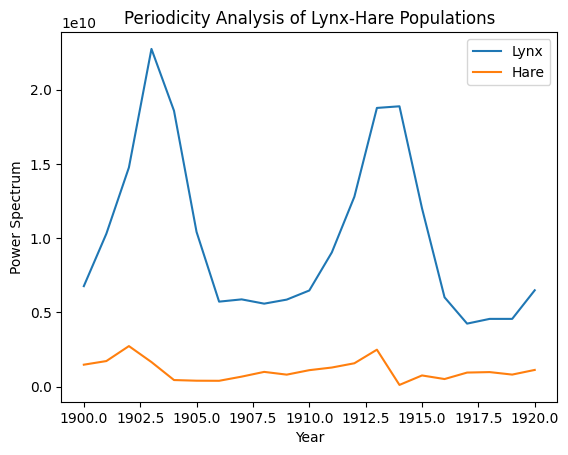

The dominant frequency (period) is approximately 0.00 years.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('populations.txt')

# Extract the years and lynx-hare populations
years = data[:, 0]
populations = data[:, 1:]

# Compute the FFT of the populations
fft = np.fft.fft(populations)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Find the dominant frequency (period) in the power spectrum
dominant_frequency_index = np.argmax(power_spectrum)
dominant_frequency = 1 / years[dominant_frequency_index]

# Plot the power spectrum
plt.plot(years, power_spectrum[:, 0], label='Lynx')
plt.plot(years, power_spectrum[:, 1], label='Hare')
plt.xlabel('Year')
plt.ylabel('Power Spectrum')
plt.title('Periodicity Analysis of Lynx-Hare Populations')
plt.legend()
plt.show()

# Print the dominant frequency (period)
print(f"The dominant frequency (period) is approximately {dominant_frequency:.2f} years.")


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

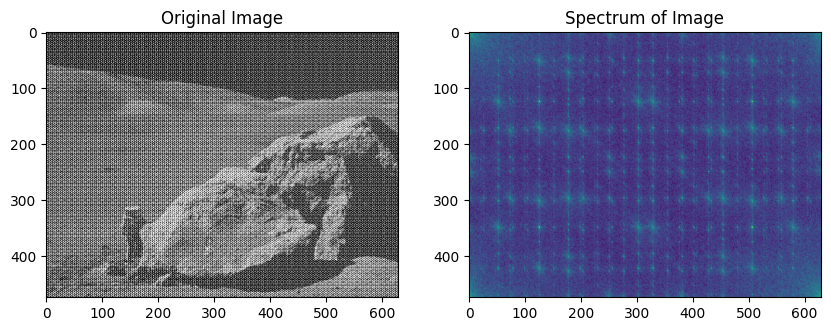

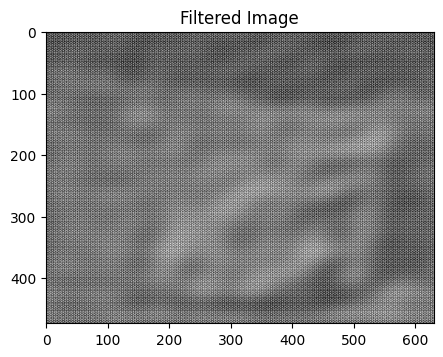

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm

# Import the image as a 2D numpy array
image = plt.imread("images/moonlanding.png")

# Plot the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Perform 2D FFT on the image
fft_image = fft2(image)

# Plot the spectrum of the image
plt.subplot(1, 2, 2)
plt.imshow(np.abs(fft_image), norm=LogNorm(vmin=5))
plt.title('Spectrum of Image')

# Identify the noise regions in the spectrum
noise_threshold = 1000
fft_image[np.abs(fft_image) < noise_threshold] = 0

# Apply inverse Fourier transform to obtain the filtered image
filtered_image = np.real(ifft2(fft_image))

# Plot the filtered image
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.show()
